In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def manual_rfft(x, n=None):
  N = len(x)

  # Handle the n parameter
  if n is None:
    n = N
  elif n < N:
    x = x[:n]  # Crop the input if n is smaller than the length of x
    N = n
  elif n > N:
    x = np.pad(x, (0, n - N), mode='constant')  # Pad with zeros if n is larger than the length of x
    N = n

  # Base case: if the input contains just one element, return it
  if N <= 1:
    return x

  # Recursive case: divide the input into even and odd indexed elements
  even = manual_rfft(x[0::2])  # Even indexed elements
  odd = manual_rfft(x[1::2])   # Odd indexed elements

  # Combine the results
  T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(len(odd))]
  spectrum = [even[k] + T[k] for k in range(len(even))] + \
             [even[k] - T[k] for k in range(len(even))]

  # For RFFT, return only the non-redundant part (positive frequencies)
  return spectrum[:N//2 + 1]

In [10]:
# Input signal (real-valued)
x = np.array([0, 1, 2, 3, 4, 5, 6, 7], dtype=float)

# Compute RFFT manually
rfft_result = np.abs(manual_rfft(x, n=4))

# Compare with NumPy's built-in RFFT
numpy_rfft_result = np.abs(np.fft.rfft(x, n=4))

print("Are the results close?", np.allclose(rfft_result, numpy_rfft_result))

Are the results close? True


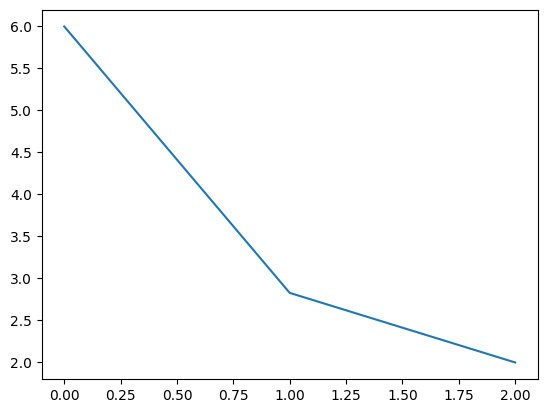

In [11]:
plt.plot(rfft_result)

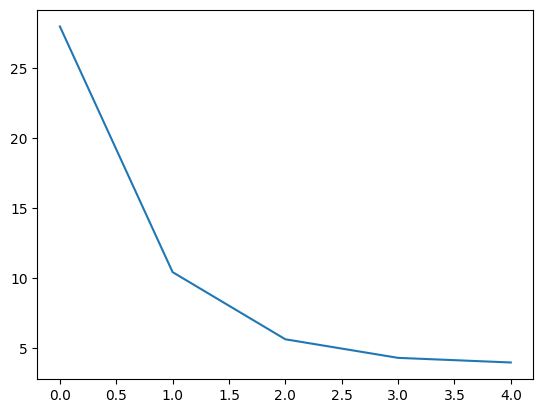

In [9]:
plt.plot(numpy_rfft_result)